In [1]:
#Importing important libraries
import pickle
import numpy as np
import matplotlib.pyplot as plt
import csv
%matplotlib inline

In [2]:
import csv

In [ ]:
#Importing Deep Learning libraries
keras.layers import Flatten,Dropout
import keras
from keras.layers import Input, Conv2D, Dense, MaxPooling2D, BatchNormalization, Activation
from keras.models import Model

In [6]:
#Extracting training images and training labels
with open('train_image.pkl','rb') as f:
    train_data = pickle.load(f)

In [7]:
with open('train_label.pkl','rb') as f:
    train_label = pickle.load(f)

In [8]:
#Displaying Information about the training dataset
print(type(train_label))
print(len(train_data))
print(type(train_data))
print(len(train_label))

<class 'list'>
8000
<class 'list'>
8000


In [9]:
#Converting list data to numpy arrays that is required by Keras
train_data = np.array(train_data)
train_label = np.array(train_label)

In [10]:
#Reshaping data required for CNN Model
train_data = np.reshape(train_data,(-1,28,28,1))

In [11]:
train_data.shape

(8000, 28, 28, 1)

In [12]:
#Determining number of classes in the dataset
np.unique(train_label)

array([0, 2, 3, 6])


# Changing labels
#### 6 -- 1

In [13]:
#Changing train label 6 to 1 for training
train_label = np.where(train_label != 6, train_label, 1)
print(np.unique(train_label))

[0 1 2 3]


In [ ]:
#Converting to one-hot vectors for softmax activation
y_label = keras.utils.to_categorical(train_label,4)

In [15]:
#Normalizing the data values between [0,1]
train_data = train_data.astype('float32')
train_data/=255

In [16]:
#Viewing an image
temp = train_data[5050][:][:]
temp = np.reshape(temp,(28,28))
print(temp.shape)

(28, 28)


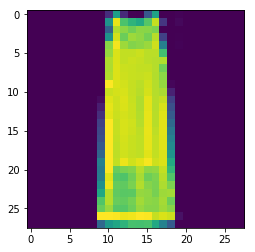

In [17]:
plt.imshow(temp)

In [18]:
#Since there is no validation and test data I divided into various sets for evaluation
print(train_data.shape)
X_train = np.concatenate((train_data[:1600], train_data[2000:3600],train_data[4000:5600],train_data[6000:7600]), axis=0)
X_val = np.concatenate((train_data[1600:1900], train_data[3600:3900],train_data[5600:5900],train_data[7600:7900]), axis=0)
X_test = np.concatenate((train_data[1900:2000], train_data[3900:4000],train_data[5900:6000],train_data[7900:8000]), axis=0)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(8000, 28, 28, 1)
(6400, 28, 28, 1)
(1200, 28, 28, 1)
(400, 28, 28, 1)


In [ ]:
print(y_label.shape)
y_train = np.concatenate((y_label[:1600], y_label[2000:3600],y_label[4000:5600],y_label[6000:7600]), axis=0)
y_val = np.concatenate((y_label[1600:1900], y_label[3600:3900],y_label[5600:5900],y_label[7600:7900]), axis=0)
y_test = np.concatenate((y_label[1900:2000], y_label[3900:4000],y_label[5900:6000],y_label[7900:8000]), axis=0)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

In [ ]:
#Defining the Convolutional Network Model
def CNN_Model(input_shape, num_classes):
    X_input = Input(input_shape, dtype='float32')
    X = Conv2D(16, kernel_size=(3,3),activation='relu',padding='same')(X_input)
    X = Conv2D(32, kernel_size=(3,3),activation='relu', padding='same')(X)
    X = MaxPooling2D((2,2))(X)
    X = Conv2D(64, kernel_size=(3,3),activation='relu', padding='same')(X)
    X = Conv2D(128, kernel_size=(3,3),activation='relu', padding='same')(X)
    X = MaxPooling2D((2,2))(X)
    X = Flatten()(X)
    X = Dense(256,activation='relu')(X)
    X = Dropout(0.5)(X)
    X = Dense(num_classes,activation='softmax')(X)
    model = Model(inputs= X_input, outputs = X, name='CNN')
    return model

### Information 
#### I have not trained the model locally, but using the colab notebook remotely on google
#### Link - https://colab.research.google.com/drive/1DLRHZELht80PZiCnuYA4OzWuZAD22TuI

In [ ]:
#Instantiating the model
cnn = CNN_Model((28,28,1),4)

In [ ]:
cnn.summary()

In [ ]:
#Defining callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint('model.h5', verbose=1)
]

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Training the model
cnn.fit(X_train,y_train,epochs = 10, batch_size =32, validation_data=(X_val,y_val) ,callbacks=callbacks)

In [ ]:
#Evaluating our model on my defined test data
cnn.evaluate(X_test,y_test,verbose=1)

In [ ]:
cnn.metrics_names

In [ ]:
with open('test_image.pkl','rb') as f:
    test_data = pickle.load(f)

In [ ]:
#calculating predictions from model for the required test dataset
predictions_prob = cnn.predict(test_data)

In [ ]:
print(predictions_prob)

In [ ]:
predictions = predictions_prob.argmax(axis=-1)


# Changing labels back again
#### 1 -- 6

In [ ]:
#Changing labels back again
predictions = np.where(predictions != 1, predictions, 6)
print(np.unique(predictions))

In [ ]:
#writing into the csv file
with open('submission.csv', 'a') as csvFile:
  writer = csv.writer(csvFile)
  for i in range(predictions.shape[0]):
    row = [i, predictions[i]]
    writer.writerow(row)
    

In [ ]:
csvFile.close()